# Bear Classifier

In this notebook, we will use a vision classifer to classfiy bear(teddy, black & grizzly) and deploy the model as web app using huggiface gradio space.

In [ ]:
from fastai.vision.all import *

## Data
The data is being imported from Kaggle

Dataset - [anirudhg15/bears-fastai-2021](https://www.kaggle.com/datasets/anirudhg15/bears-fastai-2021)

In [ ]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [ ]:
#| warning: false
#| output: false

!kaggle datasets download -d anirudhg15/bears-fastai-2021
! unzip "bears-fastai-2021"

Dataset URL: https://www.kaggle.com/datasets/anirudhg15/bears-fastai-2021
License(s): CC0-1.0
 99% 269M/272M [00:15<00:00, 23.4MB/s]
100% 272M/272M [00:15<00:00, 18.0MB/s]
Archive:  bears-fastai-2021.zip
  inflating: bears/black/00000000.jpg  
  inflating: bears/black/00000001.jpg  
  inflating: bears/black/00000002.jpg  
  inflating: bears/black/00000003.jpg  
  inflating: bears/black/00000004.jpg  
  inflating: bears/black/00000005.jpg  
  inflating: bears/black/00000006.jpg  
  inflating: bears/black/00000007.jpg  
  inflating: bears/black/00000008.jpg  
  inflating: bears/black/00000009.jpg  
  inflating: bears/black/00000011.jpeg  
  inflating: bears/black/00000012.jpg  
  inflating: bears/black/00000013.jpg  
  inflating: bears/black/00000014.jpg  
  inflating: bears/black/00000015.png  
  inflating: bears/black/00000016.jpg  
  inflating: bears/black/00000017.jpg  
  inflating: bears/black/00000018.jpg  
  inflating: bears/black/00000019.jpg  
  inflating: bears/black/00000020.j

In [ ]:
from pathlib import Path

In [ ]:
path = Path('bears')

In [ ]:
bl_bear = (path/'black').ls().sorted()
bl_bear[1]

Path('bears/black/00000001.jpg')

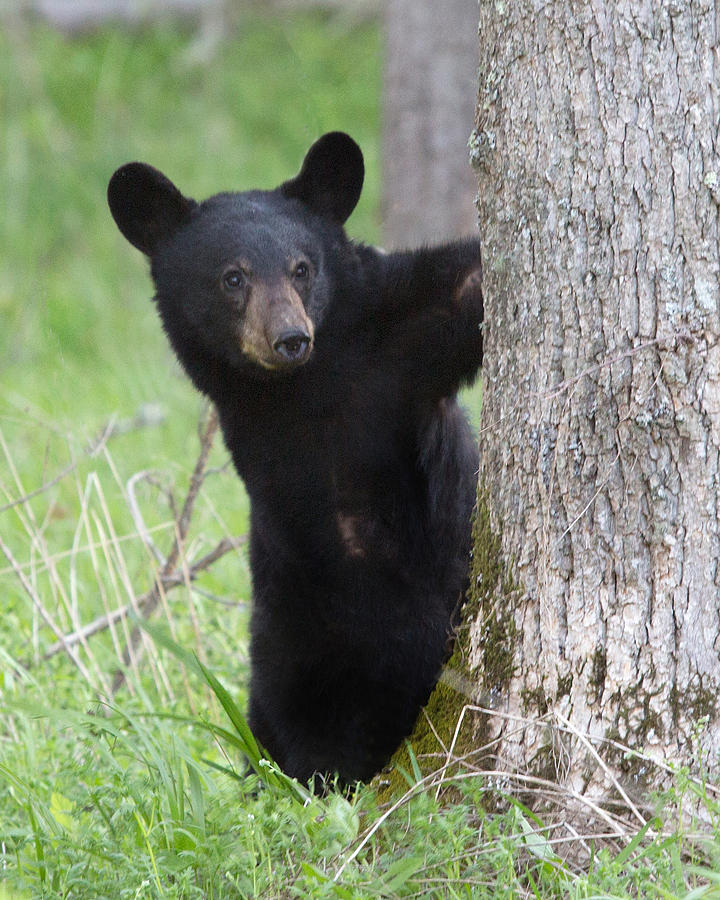

In [ ]:
Image.open(bl_bear[1])

## DLS function fastai explaination

In [ ]:
def get_dls(bs, size):
  dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                     get_items=get_image_files,
                     splitter=RandomSplitter(),
                     get_y=parent_label,
                     item_tfms=Resize(size))

  return dblock.dataloaders(path, bs=bs)

In [ ]:
dls = get_dls(64, 224)

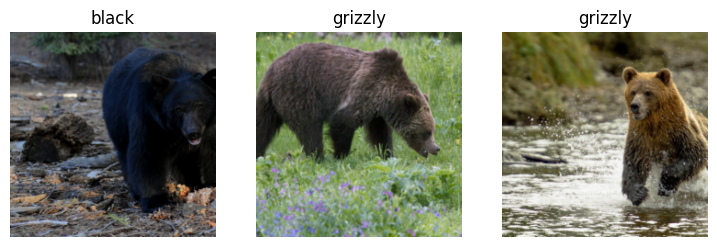

In [ ]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
#| warning: false

learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 181MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.629151,0.250812,0.122807,00:21


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,0.429806,0.061032,0.017544,00:22
1,0.268742,0.013778,0.000000,00:21
2,0.186102,0.013141,0.000000,00:21
3,0.139788,0.016549,0.017544,00:20


## Interpretting the model

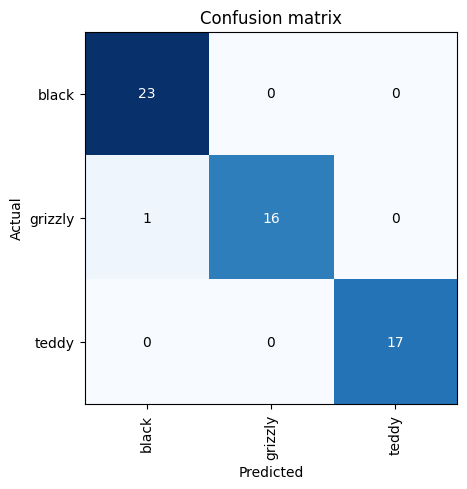

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

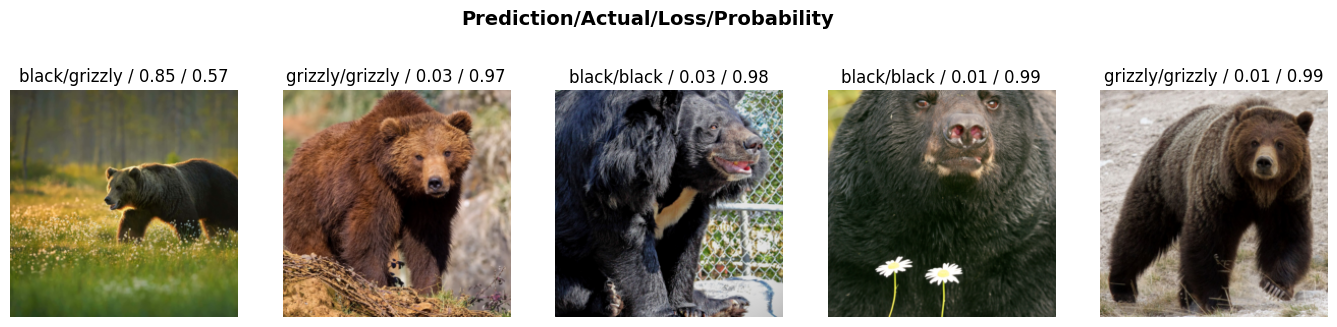

In [ ]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))

## Prediction

In [ ]:
learn.predict('/content/bears/black/00000017.jpg')

('black', tensor(0), tensor([9.9993e-01, 1.4458e-06, 7.3126e-05]))

## Saving the Model

In [ ]:
learn.export(fname='bear_model.pkl', pickle_module=pickle, pickle_protocol=2)

## Reload Model

In [ ]:
reload_model=load_learner('bear_model.pkl', cpu=True, pickle_module=pickle)
reload_model

In [ ]:
reload_model.predict('/content/bears/black/00000017.jpg')

('black', tensor(0), tensor([9.9993e-01, 1.4458e-06, 7.3126e-05]))